In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv')

data.head()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [3]:
data.tail()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
268,268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,2
269,269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,NaN,NaN,2
270,270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,NaN,NaN,2
271,271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,NaN,NaN,2
272,272,2,77,6.0,3,3,2.0,1,0,0,1,0,0,0,0,0,0,NaN,NaN,2


In [4]:
data.shape

(273, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               273 non-null    int64  
 1   Gender                   273 non-null    int64  
 2   Age                      273 non-null    int64  
 3   Schooling                272 non-null    float64
 4   Breastfeeding            273 non-null    int64  
 5   Varicella                273 non-null    int64  
 6   Initial_Symptom          272 non-null    float64
 7   Mono_or_Polysymptomatic  273 non-null    int64  
 8   Oligoclonal_Bands        273 non-null    int64  
 9   LLSSEP                   273 non-null    int64  
 10  ULSSEP                   273 non-null    int64  
 11  VEP                      273 non-null    int64  
 12  BAEP                     273 non-null    int64  
 13  Periventricular_MRI      273 non-null    int64  
 14  Cortical_MRI             2

In [6]:
data.columns

Index(['Unnamed: 0', 'Gender', 'Age', 'Schooling', 'Breastfeeding',
       'Varicella', 'Initial_Symptom', 'Mono_or_Polysymptomatic',
       'Oligoclonal_Bands', 'LLSSEP', 'ULSSEP', 'VEP', 'BAEP',
       'Periventricular_MRI', 'Cortical_MRI', 'Infratentorial_MRI',
       'Spinal_Cord_MRI', 'Initial_EDSS', 'Final_EDSS', 'group'],
      dtype='object')

In [7]:
data.value_counts()

Unnamed: 0  Gender  Age  Schooling  Breastfeeding  Varicella  Initial_Symptom  Mono_or_Polysymptomatic  Oligoclonal_Bands  LLSSEP  ULSSEP  VEP  BAEP  Periventricular_MRI  Cortical_MRI  Infratentorial_MRI  Spinal_Cord_MRI  Initial_EDSS  Final_EDSS  group
0           1       34   20.0       1              1          2.0              1                        0                  1       1       0    0     0                    1             0                   1                1.0           1.0         1        1
79          1       34   12.0       2              2          13.0             2                        1                  1       1       1    0     1                    1             1                   1                1.0           1.0         1        1
92          1       21   20.0       1              1          13.0             2                        1                  1       1       0    1     1                    1             0                   0                1.0   

In [8]:
data.describe()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
count,273.000000,273.000000,273.000000,272.000000,273.000000,273.000000,272.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,125.000000,125.00000,273.000000
mean,136.000000,1.615385,34.062271,15.176471,1.831502,1.710623,6.430147,1.725275,0.358974,0.424908,0.369963,0.307692,0.065934,0.505495,0.432234,0.293040,0.315018,1.360000,1.44800,1.542125
std,78.952517,0.487398,11.114369,4.244175,0.874998,0.732991,4.222009,0.494066,0.558426,0.495237,0.483681,0.462386,0.248623,0.500888,0.496296,0.455993,0.465376,0.587504,0.65323,0.499137
min,0.000000,1.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
25%,68.000000,1.000000,25.000000,12.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
50%,136.000000,2.000000,33.000000,15.000000,2.000000,2.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,2.000000
75%,204.000000,2.000000,40.000000,20.000000,3.000000,2.000000,9.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.00000,2.000000
max,272.000000,2.000000,77.000000,25.000000,3.000000,3.000000,15.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.00000,2.000000


In [9]:
data.columns.unique

<bound method Index.unique of Index(['Unnamed: 0', 'Gender', 'Age', 'Schooling', 'Breastfeeding',
       'Varicella', 'Initial_Symptom', 'Mono_or_Polysymptomatic',
       'Oligoclonal_Bands', 'LLSSEP', 'ULSSEP', 'VEP', 'BAEP',
       'Periventricular_MRI', 'Cortical_MRI', 'Infratentorial_MRI',
       'Spinal_Cord_MRI', 'Initial_EDSS', 'Final_EDSS', 'group'],
      dtype='object')>

In [10]:
corr=data.corr()
corr

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
Unnamed: 0,1.000000,0.179996,-0.034494,-0.148429,0.195203,0.264722,-0.338621,-0.140338,-0.118743,-0.279448,-0.186867,-0.288727,-0.058998,-0.571462,-0.191968,-0.377943,-0.167401,-0.052287,-0.023513,0.862952
Gender,0.179996,1.000000,0.073662,-0.011534,-0.083554,-0.024540,-0.143060,-0.012918,-0.152741,-0.158170,-0.158350,-0.158114,-0.154031,-0.194613,-0.130943,-0.169238,0.001247,-0.026257,-0.032668,0.240633
Age,-0.034494,0.073662,1.000000,-0.157083,-0.062050,0.153851,0.107699,-0.027001,-0.019016,0.055289,0.088708,0.010566,0.208723,0.031307,0.083082,-0.042061,0.125557,0.048330,0.203237,-0.064426
Schooling,-0.148429,-0.011534,-0.157083,1.000000,-0.083295,-0.174905,0.012441,0.037321,0.001375,-0.023354,-0.067760,0.005967,0.062222,0.020218,0.038833,-0.061061,0.056169,-0.087222,-0.148421,-0.184484
Breastfeeding,0.195203,-0.083554,-0.062050,-0.083295,1.000000,0.582905,0.015222,0.045605,0.026431,-0.063243,-0.095397,0.046833,-0.067042,-0.031434,-0.051789,-0.050865,-0.004597,-0.090663,-0.091596,0.142580
Varicella,0.264722,-0.024540,0.153851,-0.174905,0.582905,1.000000,0.007675,-0.017292,-0.032703,-0.095529,-0.039124,0.057575,-0.036136,-0.100797,0.031800,-0.064345,-0.033557,0.001833,0.097735,0.169099
Initial_Symptom,-0.338621,-0.143060,0.107699,0.012441,0.015222,0.007675,1.000000,0.528646,0.112262,0.215385,0.251981,0.186688,0.144787,0.330916,0.009228,0.253858,0.238289,0.027463,0.135367,-0.389021
Mono_or_Polysymptomatic,-0.140338,-0.012918,-0.027001,0.037321,0.045605,-0.017292,0.528646,1.000000,0.092253,0.148275,0.073035,0.194356,0.088145,0.132399,0.021255,0.048598,0.153923,-0.015037,0.037642,-0.034895
Oligoclonal_Bands,-0.118743,-0.152741,-0.019016,0.001375,0.026431,-0.032703,0.112262,0.092253,1.000000,-0.061697,-0.030713,0.069001,0.093700,0.084930,0.021769,0.018510,0.072548,0.048200,-0.010641,-0.186351
LLSSEP,-0.279448,-0.158170,0.055289,-0.023354,-0.063243,-0.095529,0.215385,0.148275,-0.061697,1.000000,0.599875,0.390263,0.100077,0.183227,0.177415,0.130361,0.342295,0.151524,0.161361,-0.221406


<AxesSubplot:>

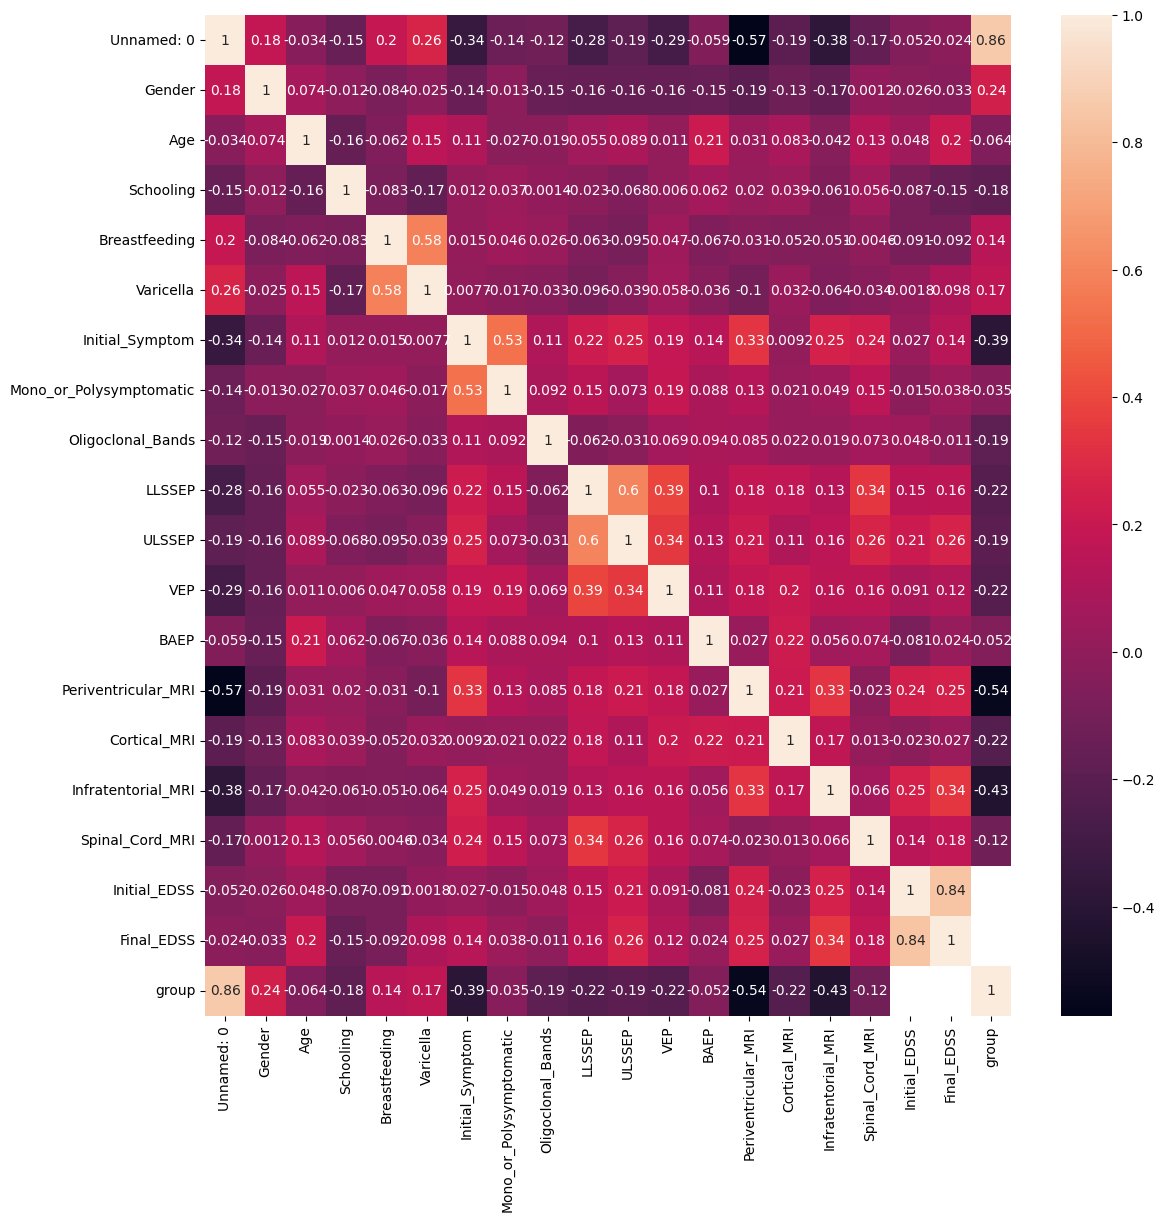

In [11]:
plt.figure(figsize=[13,13])
sns.heatmap(corr,annot=True)

In [12]:
data.dtypes

Unnamed: 0                   int64
Gender                       int64
Age                          int64
Schooling                  float64
Breastfeeding                int64
Varicella                    int64
Initial_Symptom            float64
Mono_or_Polysymptomatic      int64
Oligoclonal_Bands            int64
LLSSEP                       int64
ULSSEP                       int64
VEP                          int64
BAEP                         int64
Periventricular_MRI          int64
Cortical_MRI                 int64
Infratentorial_MRI           int64
Spinal_Cord_MRI              int64
Initial_EDSS               float64
Final_EDSS                 float64
group                        int64
dtype: object

In [13]:
data.isna().sum()

Unnamed: 0                   0
Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64

In [14]:
data.isna().sum()/len(data)*100

Unnamed: 0                  0.000000
Gender                      0.000000
Age                         0.000000
Schooling                   0.366300
Breastfeeding               0.000000
Varicella                   0.000000
Initial_Symptom             0.366300
Mono_or_Polysymptomatic     0.000000
Oligoclonal_Bands           0.000000
LLSSEP                      0.000000
ULSSEP                      0.000000
VEP                         0.000000
BAEP                        0.000000
Periventricular_MRI         0.000000
Cortical_MRI                0.000000
Infratentorial_MRI          0.000000
Spinal_Cord_MRI             0.000000
Initial_EDSS               54.212454
Final_EDSS                 54.212454
group                       0.000000
dtype: float64

In [15]:
data.drop(['Unnamed: 0','Initial_EDSS','Final_EDSS'],axis=1,inplace=True)

In [16]:
data

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,2
269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,2
270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,2
271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,2


In [17]:
data.isna().sum()

Gender                     0
Age                        0
Schooling                  1
Breastfeeding              0
Varicella                  0
Initial_Symptom            1
Mono_or_Polysymptomatic    0
Oligoclonal_Bands          0
LLSSEP                     0
ULSSEP                     0
VEP                        0
BAEP                       0
Periventricular_MRI        0
Cortical_MRI               0
Infratentorial_MRI         0
Spinal_Cord_MRI            0
group                      0
dtype: int64

In [18]:
data['Schooling'].fillna(data['Schooling'].mean(),inplace=True)
data['Initial_Symptom'].fillna(data['Initial_Symptom'].mean(),inplace=True)

In [19]:
data.isna().any()

Gender                     False
Age                        False
Schooling                  False
Breastfeeding              False
Varicella                  False
Initial_Symptom            False
Mono_or_Polysymptomatic    False
Oligoclonal_Bands          False
LLSSEP                     False
ULSSEP                     False
VEP                        False
BAEP                       False
Periventricular_MRI        False
Cortical_MRI               False
Infratentorial_MRI         False
Spinal_Cord_MRI            False
group                      False
dtype: bool

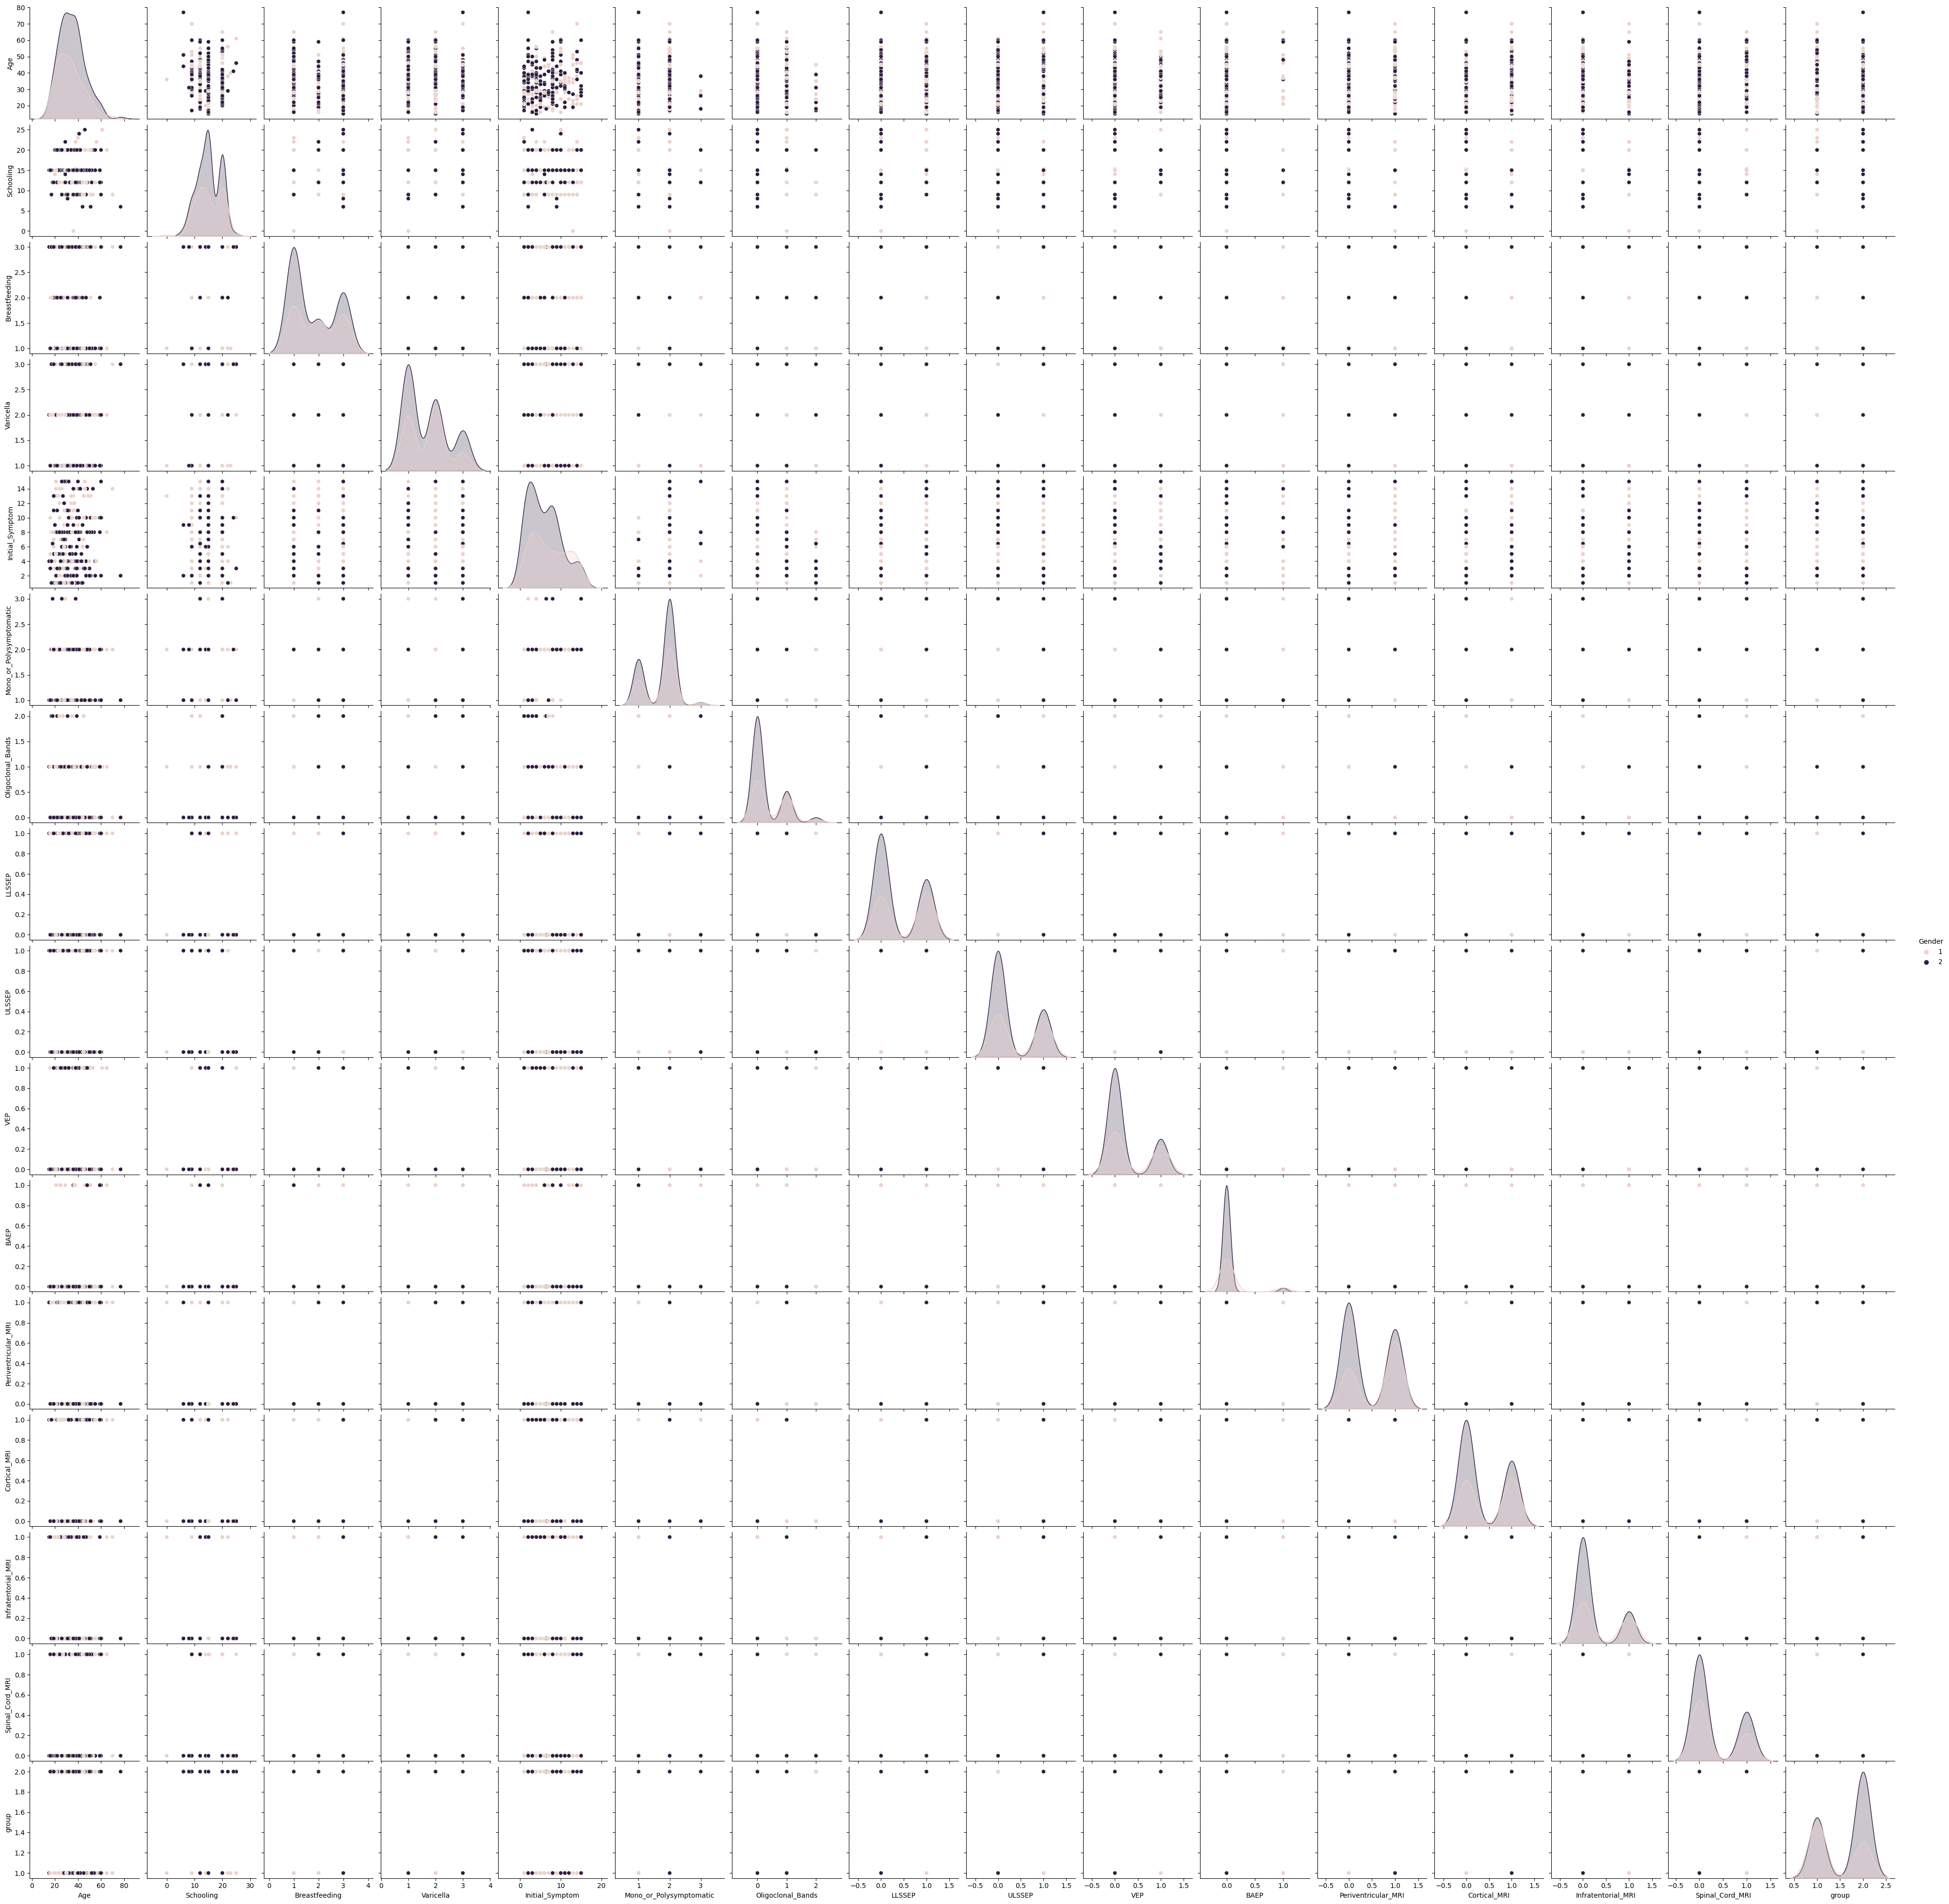

In [20]:
sns.pairplot(data=data,hue='Gender')

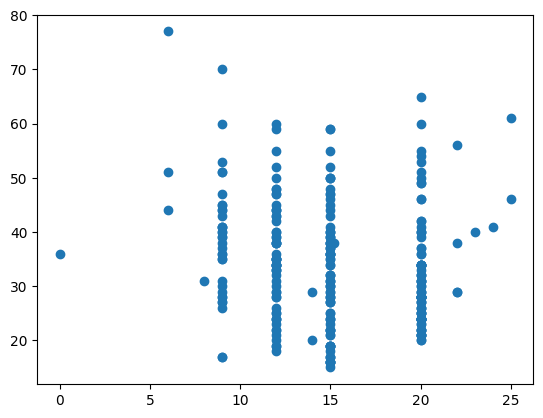

In [21]:
plt.scatter('Schooling','Age',data=data)

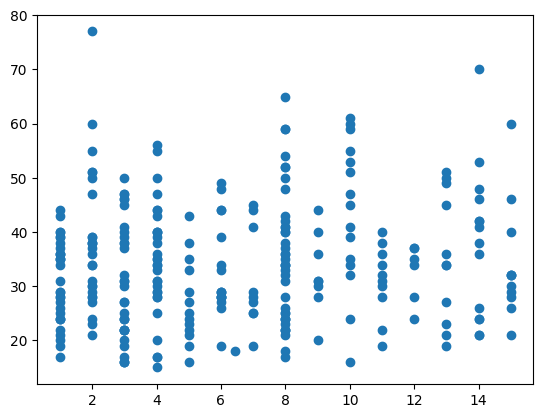

In [22]:
plt.scatter('Initial_Symptom','Age',data=data)

<AxesSubplot:ylabel='Count'>

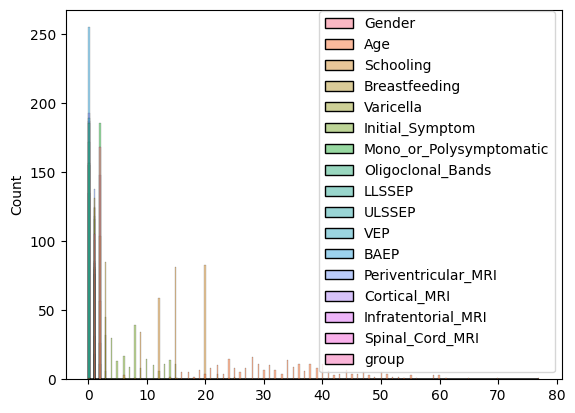

In [23]:
sns.histplot(data=data)

In [191]:
from autoviz.AutoViz_Class import AutoViz_Class

av=AutoViz_Class()

In [192]:
av.AutoViz('conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv')

Shape of your Data Set loaded: (273, 20)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nullpercent,NuniquePercent,dtype,Nuniques,Nulls,Least num. of categories,Data cleaning improvement suggestions
Final_EDSS,54.212454,1.098901,float64,3,148,0,"fill missing values, right skewed distribution: cap or drop outliers"
Initial_EDSS,54.212454,1.098901,float64,3,148,0,"fill missing values, right skewed distribution: cap or drop outliers"
Schooling,0.366300,4.395604,float64,12,1,0,fill missing values
Initial_Symptom,0.366300,5.494505,float64,15,1,0,fill missing values
Unnamed: 0,0.000000,100.000000,int64,273,0,0,possible ID column: drop
VEP,0.000000,0.732601,int64,2,0,0,
Spinal_Cord_MRI,0.000000,0.732601,int64,2,0,0,
Infratentorial_MRI,0.000000,0.732601,int64,2,0,0,
Cortical_MRI,0.000000,0.732601,int64,2,0,0,
Periventricular_MRI,0.000000,0.732601,int64,2,0,0,


    20 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0']
Number of All Scatter Plots = 10
All Plots done
Time to run AutoViz = 19 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,2
269,269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,NaN,NaN,2
270,270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,NaN,NaN,2
271,271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,NaN,NaN,2


In [24]:
data

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,2
269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,2
270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,2
271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,2


In [25]:
data['Gender'].replace([1,2],[0,1],inplace=True)
data['group'].replace([1,2],[0,1],inplace=True)

In [26]:
data['group'].value_counts()

1    148
0    125
Name: group, dtype: int64

In [27]:
x=data.drop('group',axis=1).values
y=data['group'].values

In [28]:
x.shape

(273, 16)

In [29]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((204, 16), (69, 16), (204,), (69,))

In [51]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()

x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)


In [33]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

parameters={'base_score':[0.3,0.5,0.6,0.7],
           'gamma':[0,1,2,3],
           'learning_rate':[0.1,0.3,0.5],
           'max_depth':[5,6,7,8,9],
           'n_estimators':[100,200,300,400]
           }

clf=XGBClassifier(random_state=0)

model=GridSearchCV(clf,parameters,cv=3)

model.fit(x_train,y_train)

In [55]:
model.best_params_

{'base_score': 0.3,
 'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 100}

In [52]:
model=XGBClassifier(
                   gamma=1,
                   learning_rate=0.1,
                   max_depth=6,
                   n_estimators=100)

model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [53]:
model.score(x_test,y_test)

0.8695652173913043

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score

pred=model.predict(x_test)

In [55]:
print("Accuracy Score:",accuracy_score(y_test,pred))
print("F1 Score:",f1_score(y_test,pred))
print('Recall Score:',recall_score(y_test,pred))
print('Precision Score:',precision_score(y_test,pred))
print('Classification Report:',classification_report(y_test,pred))

print("Confusion Matrics")
con_m=confusion_matrix(y_test,pred)
con_m

Accuracy Score: 0.8695652173913043
F1 Score: 0.891566265060241
Recall Score: 0.925
Precision Score: 0.8604651162790697
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.79      0.84        29
           1       0.86      0.93      0.89        40

    accuracy                           0.87        69
   macro avg       0.87      0.86      0.86        69
weighted avg       0.87      0.87      0.87        69

Confusion Matrics


array([[23,  6],
       [ 3, 37]], dtype=int64)

# Using ANN

In [38]:
import tensorflow as tf
from tensorflow import keras


In [56]:
model=keras.Sequential([
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense((1),activation='sigmoid')
])

In [59]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
res=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32)

Epoch 1/100
7/7 [==============================] - 0s 25ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.2147 - val_accuracy: 0.8406
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.2147 - val_accuracy: 0.8406
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.2168 - val_accuracy: 0.8406
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.2188 - val_accuracy: 0.8406
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.2191 - val_accuracy: 0.8406
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.2204 - val_accuracy: 0.8406
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.2219 - val_accuracy: 0.8406
Epoch 8/100
7/7 [===

7/7 [==============================] - 0s 32ms/step - loss: 7.6646e-04 - accuracy: 1.0000 - val_loss: 1.2972 - val_accuracy: 0.8406
Epoch 59/100
7/7 [==============================] - 0s 11ms/step - loss: 7.6063e-04 - accuracy: 1.0000 - val_loss: 1.2998 - val_accuracy: 0.8406
Epoch 60/100
7/7 [==============================] - 0s 14ms/step - loss: 7.5384e-04 - accuracy: 1.0000 - val_loss: 1.3011 - val_accuracy: 0.8406
Epoch 61/100
7/7 [==============================] - 0s 14ms/step - loss: 7.4757e-04 - accuracy: 1.0000 - val_loss: 1.3018 - val_accuracy: 0.8406
Epoch 62/100
7/7 [==============================] - 0s 11ms/step - loss: 7.4166e-04 - accuracy: 1.0000 - val_loss: 1.3022 - val_accuracy: 0.8406
Epoch 63/100
7/7 [==============================] - 0s 12ms/step - loss: 7.3551e-04 - accuracy: 1.0000 - val_loss: 1.3032 - val_accuracy: 0.8406
Epoch 64/100
7/7 [==============================] - 0s 12ms/step - loss: 7.3041e-04 - accuracy: 1.0000 - val_loss: 1.3055 - val_accuracy: 0.840

In [70]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 1.3490 - accuracy: 0.8406


[1.3490185737609863, 0.8405796885490417]

In [66]:
model.evaluate(x_train,y_train)

7/7 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000


[0.001239924575202167, 1.0]

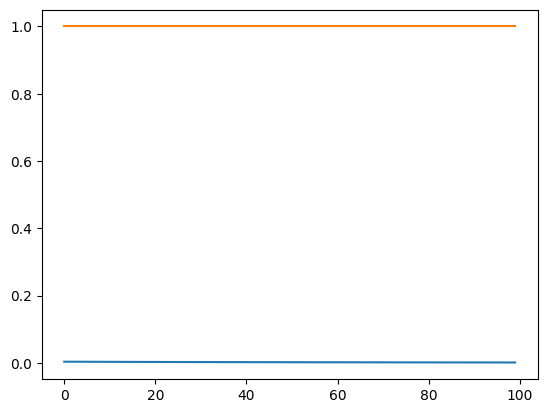

In [67]:
plt.plot(res.history['loss'],label='loss')
plt.plot(res.history['accuracy'],label='Accuracy')


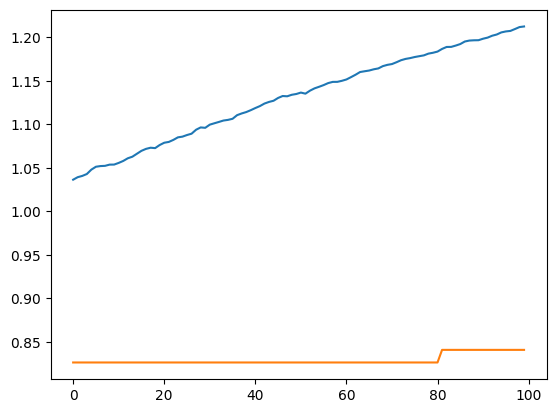

In [68]:
plt.plot(res.history['val_loss'],label='val_loss')
plt.plot(res.history['val_accuracy'],label='val_Accuracy')